<a href="https://colab.research.google.com/github/FarhanFayyadh/Pemrograman_Python/blob/main/Tugas_besar_python_pertemuan_14_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def cos(frk,lok,ht,hr,j):
  #frk = frekuensi (MHz)
  #lok = urban, suburban, open
  #ht = tinggi tower (meter)
  #hr = tinggi user (meter)
  #j = jarak (meter)
    if frk in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frk in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if lok=='urban' :
        Cm=0
    elif lok=='suburban' :
        Cm= -2*((np.log10((frk/28)**2))-5.4)
    elif lok=='open' :
        Cm= -4.78*(np.log10(frk))+18.33*(np.log10(frk))-40.94
    else :
        Cm='lok salah'
    
    ahr = (1.1*np.log10(frk)-0.7)*hr-(1.56*np.log10(frk)-1.8)
    Lp = Ca+(Cb*np.log10(frk))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(j))-Cm
    
    return Lp

def PReceiver(Ptx, Lp, Gtx, Grx):
  Prx = Ptx-Lp+Gtx+Grx
  return Prx

def SNR (Prx, Bandwidth):
  no=-174+(10*np.log10(Bandwidth))
  no=10**(no/10)
  SNR= Prx/no
  return SNR

def Capacity (SNR, Bandwidth):
  c=Bandwidth*np.log2(1+SNR)
  return c

In [10]:
#Model Frekuensi 1800
f=1800
fa=900
fb=700
loka="urban"
lokb="suburban"
lokc= "open"
tower=80
user=1.5
jmin=300
jmax=1000
N=200
Ptx=30
Ptx=Ptx*1000
Ptx=10*np.log10(Ptx)
Gtx=10
Grx=2
Bandwidth= 5000000



#Perhitungang Daya Terima Berdasarkan Frekuensi
j=np.random.randint(jmin,jmax,N)
j=j[np.argsort(j)]
a= cos(f,loka,tower,user,j)
a=a[np.argsort(j)]
a1= PReceiver(Ptx,a,Gtx,Grx)
a1= 10**(a1/10)
b= cos(fa,loka,tower,user,j)
b=b[np.argsort(j)]
b1= PReceiver(Ptx,b,Gtx,Grx)
b1= 10**(b1/10)
c= cos(fb,loka,tower,user,j)
c=c[np.argsort(j)]
c1= PReceiver(Ptx,c,Gtx,Grx)
c1= 10**(c1/10)




#Perhitungan Daya Terima Berdasarkan Lokasi
aa= cos(f,loka,tower,user,j)
aa=aa[np.argsort(j)]
aa1= PReceiver(Ptx,aa,Gtx,Grx)
aa1= 10**(aa1/10)
bb= cos(f,lokb,tower,user,j)
bb=bb[np.argsort(j)]
bb1= PReceiver(Ptx,bb,Gtx,Grx)
bb1= 10**(bb1/10)
cc= cos(f,lokc,tower,user,j)
cc=cc[np.argsort(j)]
cc1= PReceiver(Ptx,cc,Gtx,Grx)
cc1= 10**(cc1/10)



#Perhitungan SNR Berdasarkan Frekuensi
SNR1= SNR(a1,Bandwidth)
SNR2= SNR(b1,Bandwidth)
SNR3= SNR(c1,Bandwidth)



#Perhitungan SNR Berdasarkan Lokasi
SNR11= SNR(aa1,Bandwidth)
SNR22= SNR(bb1,Bandwidth)
SNR33= SNR(cc1,Bandwidth)



#Perhitungan Capacity Berdasarkan Frekuensi
ca1 = Capacity(SNR1,Bandwidth)
ca2 = Capacity(SNR2,Bandwidth)
ca3 = Capacity(SNR3,Bandwidth)



#Perhitungan Capacity Berdasarkan Lokasi
ca11 = Capacity(SNR11,Bandwidth)
ca22 = Capacity(SNR22,Bandwidth)
ca33 = Capacity(SNR33,Bandwidth)

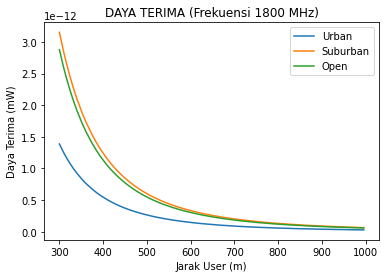

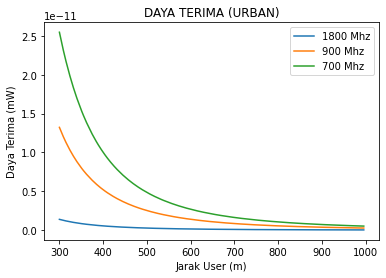

In [12]:
plt.figure("Frekuensi")
plt.title("DAYA TERIMA (Frekuensi 1800 MHz)")
plt.plot(j,aa1,label="Urban")
plt.plot(j,bb1,label="Suburban")
plt.plot(j,cc1,label="Open")
plt.legend()
plt.xlabel("Jarak User (m)")
plt.ylabel("Daya Terima (mW)")


plt.figure("Mode Urban")
plt.title("DAYA TERIMA (URBAN)")
plt.plot(j,a1,label="1800 Mhz")
plt.plot(j,b1,label="900 Mhz")
plt.plot(j,c1,label="700 Mhz")
plt.legend()
plt.xlabel("Jarak User (m)")
plt.ylabel("Daya Terima (mW)")
plt.show()

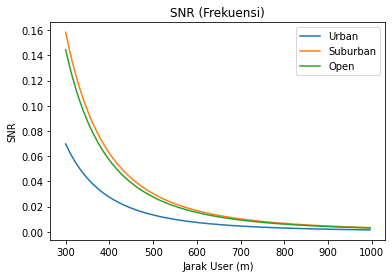

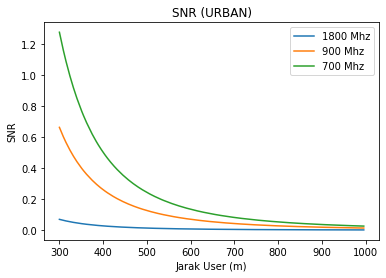

In [13]:
plt.figure("SNR Frekuensi")
plt.title("SNR (Frekuensi)")
plt.plot(j,SNR11,label="Urban")
plt.plot(j,SNR22,label="Suburban")
plt.plot(j,SNR33,label="Open")
plt.legend()
plt.xlabel("Jarak User (m)")
plt.ylabel("SNR")


plt.figure("SNR Urban")
plt.title("SNR (URBAN)")
plt.plot(j,SNR1,label="1800 Mhz")
plt.plot(j,SNR2,label="900 Mhz")
plt.plot(j,SNR3,label="700 Mhz")
plt.legend()
plt.xlabel("Jarak User (m)")
plt.ylabel("SNR")
plt.show()

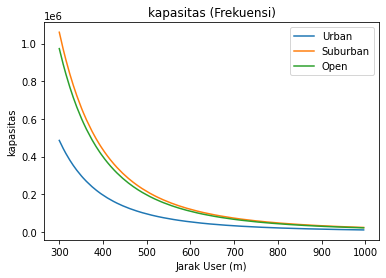

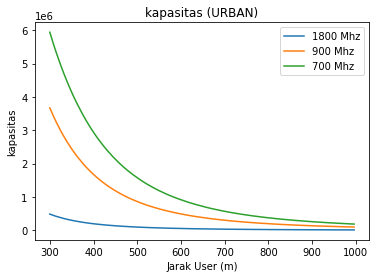

In [14]:
plt.figure("kapasitas Frekuensi")
plt.title("kapasitas (Frekuensi)")
plt.plot(j,ca11,label="Urban")
plt.plot(j,ca22,label="Suburban")
plt.plot(j,ca33,label="Open")
plt.legend()
plt.xlabel("Jarak User (m)")
plt.ylabel("kapasitas")


plt.figure("kapasitas Urban")
plt.title("kapasitas (URBAN)")
plt.plot(j,ca1,label="1800 Mhz")
plt.plot(j,ca2,label="900 Mhz")
plt.plot(j,ca3,label="700 Mhz")
plt.legend()
plt.xlabel("Jarak User (m)")
plt.ylabel("kapasitas")
plt.show()